## 1. 📦 Load and Inspect the Data
- Load train.csv and test.csv
- Print basic info: .shape, .head(), .info(), .describe()
- Check for missing values (there shouldn't be any, but still worth confirming)

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
set(train_df['label'].values)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
train_df.shape

(42000, 785)

In [5]:
test_df.shape

(28000, 784)

In [6]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
train_df.isnull().sum().sum()

0

In [8]:
# Separate features and labels
X = train_df.drop("label", axis=1)
y = train_df["label"]

## 2. 🧾 Label Distribution
- Use value_counts() and bar plots to see distribution of digits (0–9)
- Check for class imbalance (MNIST is balanced, but still good to confirm)

In [9]:
for i,val in train_df['label'].value_counts().items():
    print(f'digit {i} has {val} values')

digit 1 has 4684 values
digit 7 has 4401 values
digit 3 has 4351 values
digit 9 has 4188 values
digit 2 has 4177 values
digit 6 has 4137 values
digit 0 has 4132 values
digit 4 has 4072 values
digit 8 has 4063 values
digit 5 has 3795 values


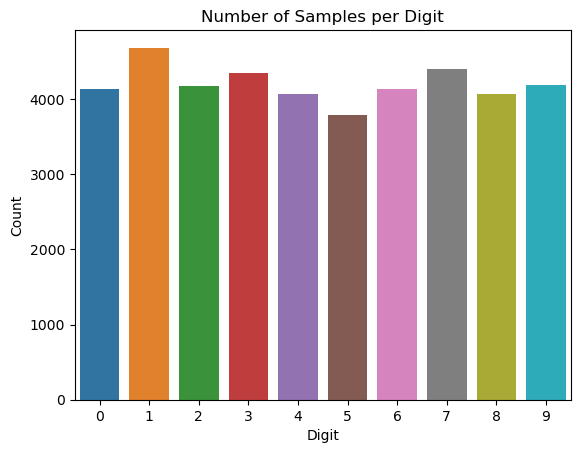

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get label counts
label_counts = train_df['label'].value_counts().sort_index()  # sorted by digit 0–9

# Create barplot
sns.barplot(x=label_counts.index, y=label_counts.values)

# Labeling
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Number of Samples per Digit")
plt.show()

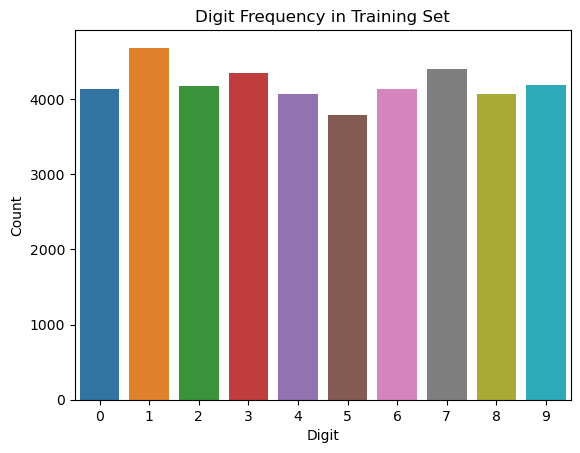

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=train_df)
plt.title("Digit Frequency in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

## 3. 🖼️ Visualize Digits
- Plot 5 samples per class (0–9)
- Reshape each row from (784,) to (28,28)
- Use matplotlib.pyplot.imshow() with cmap='gray'

📌 Tip: Plot in a 10x5 grid (10 rows, 5 columns per digit)

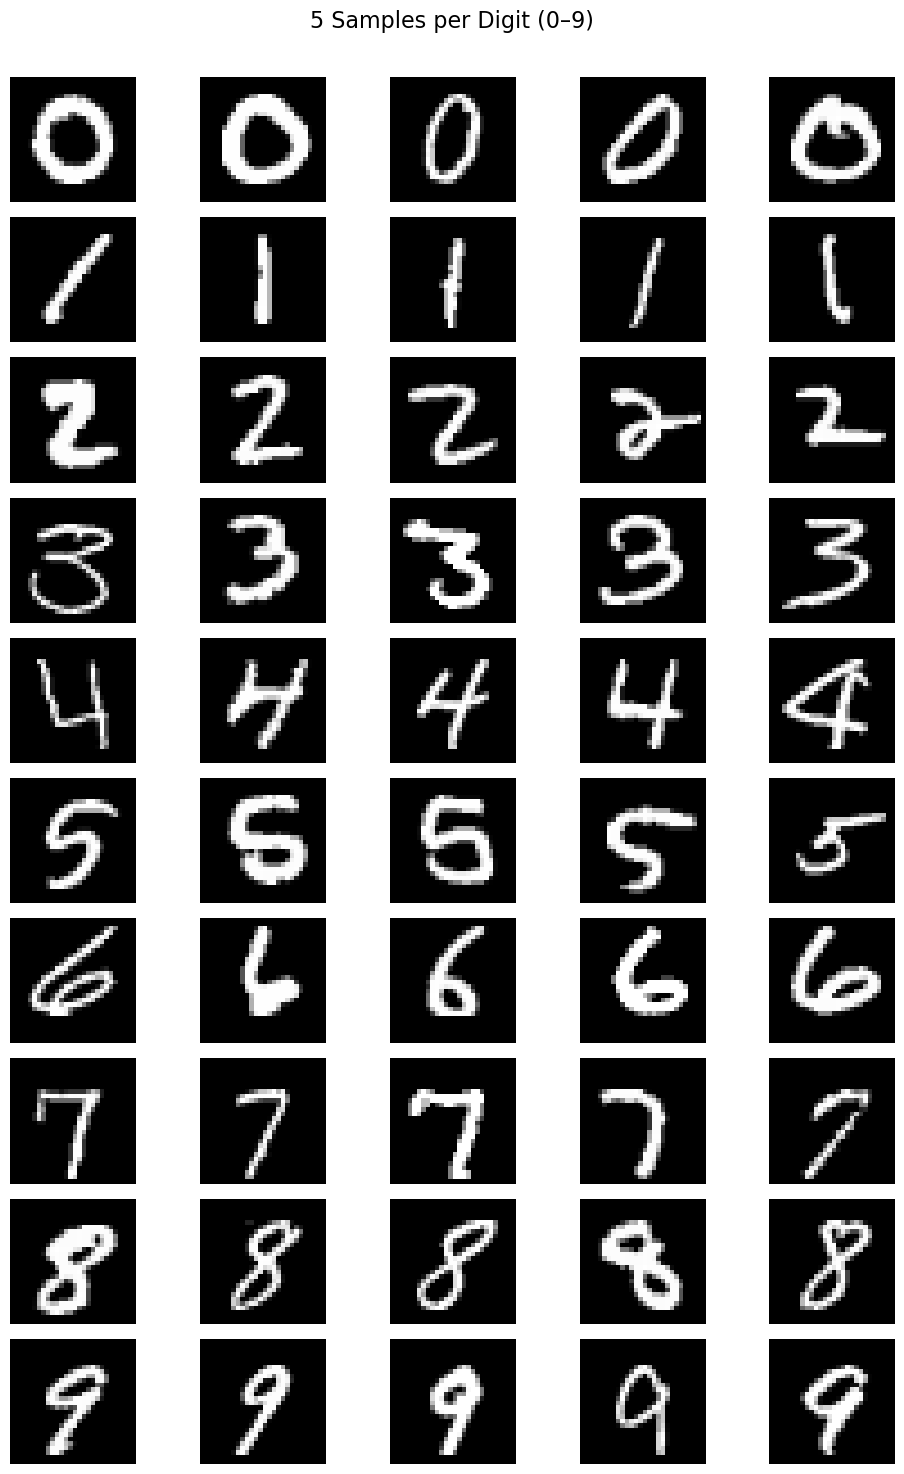

In [12]:
# Create a 10x5 grid (10 rows for digits 0-9, 5 samples each)
fig, axes = plt.subplots(10, 5, figsize=(10, 15))
fig.suptitle('5 Samples per Digit (0–9)', fontsize=16)

# Loop through digit classes (0–9)
for digit in range(10):
    # Get first 5 samples of this digit
    digit_images = X[y == digit].head(5).values

    for i in range(5):
        ax = axes[digit, i]
        ax.imshow(digit_images[i].reshape(28, 28), cmap='gray')
        ax.axis('off')  # Hide axis

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust spacing
plt.show()

## 4. 🔍 Pixel Value Distributions
- Plot histogram of all pixel values (0–255) across dataset
- Check if most pixels are 0 (MNIST is sparse—most background is white)
- Plot few individual digit heatmaps

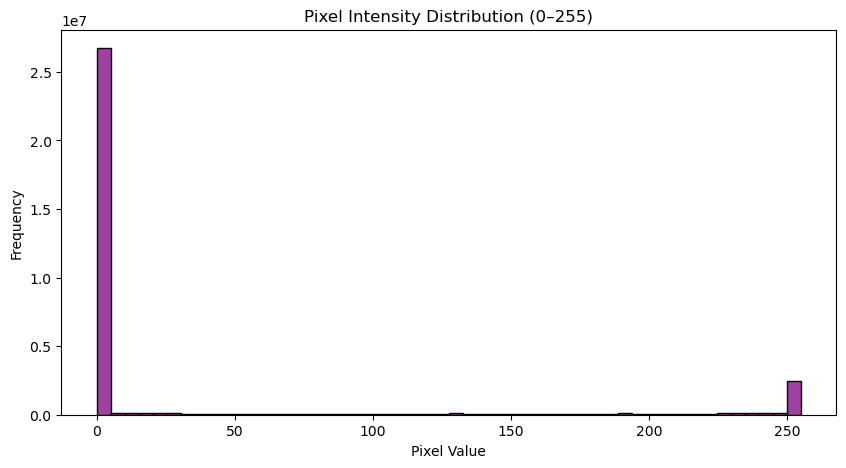

In [13]:
'''
🧠 What to expect:
You'll likely see a large peak at 0 — this is because most of the pixels are white (background). 
This tells you that MNIST is sparse, which supports why dimensionality reduction (PCA, Autoencoders) is meaningful.
'''

import matplotlib.pyplot as plt
import seaborn as sns

# Exclude label column
pixels = train_df.drop("label", axis=1).values.flatten()

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(pixels, bins=50, kde=False, color='purple')

plt.title("Pixel Intensity Distribution (0–255)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

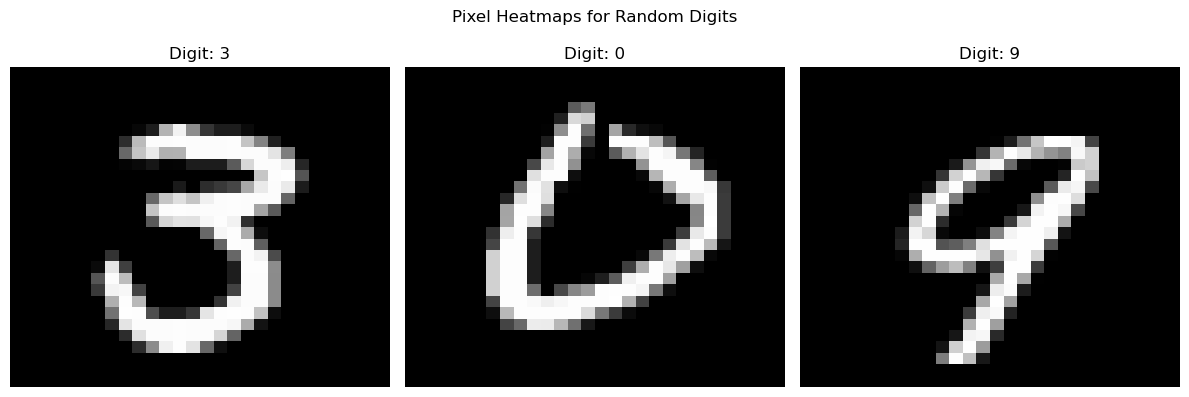

In [14]:
'''
🧠 What this shows:
You can visualize how "ink" is distributed across the image. 
The center is usually darker for most digits, and the corners are lighter (almost always 0).
'''

import numpy as np

# Pick 3 random samples
sample_indices = np.random.choice(train_df.index, 3, replace=False)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, idx in enumerate(sample_indices):
    sample = train_df.iloc[idx, 1:].values.reshape(28, 28)
    label = train_df.iloc[idx, 0]

    sns.heatmap(sample, cmap='gray', cbar=False, ax=axes[i])
    axes[i].set_title(f'Digit: {label}')
    axes[i].axis('off')

plt.suptitle('Pixel Heatmaps for Random Digits')
plt.tight_layout()
plt.show()

## 5. 📊 Mean Image Per Class
- Compute average image for each digit
- Visualize the “mean digit” for each class

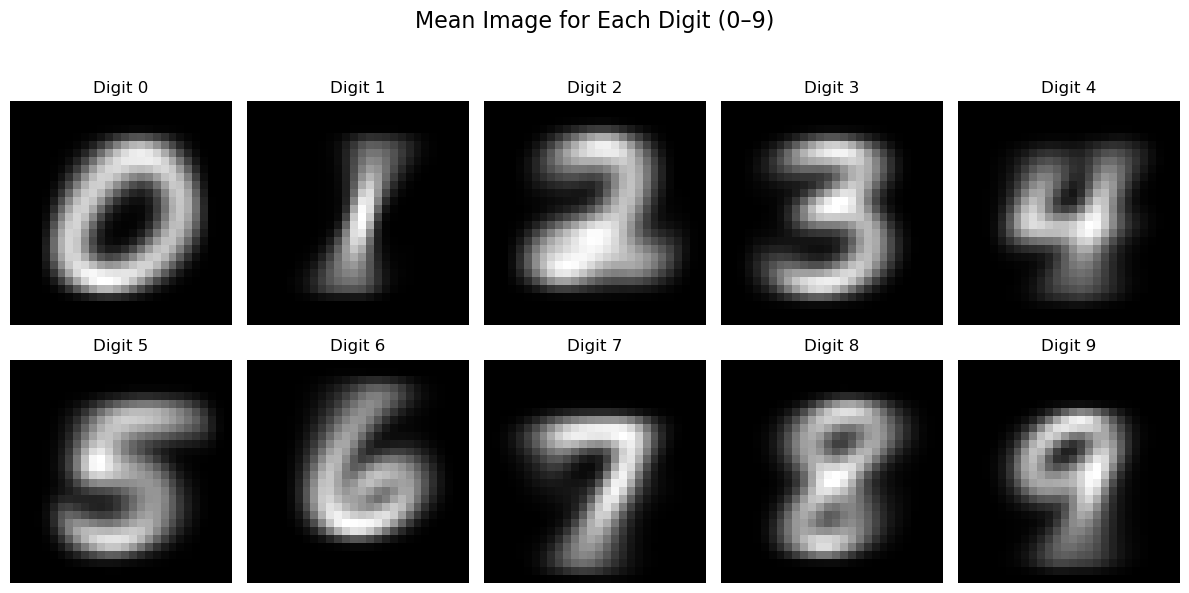

In [15]:
'''
🧠 What You Learn from This:
Where the "ink" tends to be for each digit
Some digits may have more blurry means due to higher variation (e.g., 8, 5)
Gives you intuition about pixel importance for each class
'''

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare figure
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Mean Image for Each Digit (0–9)', fontsize=16)

# Loop through digits 0 to 9
for digit in range(10):
    # Select all rows where label == digit
    digit_data = train_df[train_df['label'] == digit].drop('label', axis=1)

    # Compute mean across all samples of this digit
    mean_image = digit_data.mean().values.reshape(28, 28)

    # Plot in grid
    ax = axes[digit // 5, digit % 5]
    sns.heatmap(mean_image, ax=ax, cmap='gray', cbar=False)
    ax.set_title(f'Digit {digit}')
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 6. 📉 Pixel-wise Variance
- Calculate variance across all images for each pixel
- Plot variance heatmap (28x28)
- Helps identify informative vs dead zones

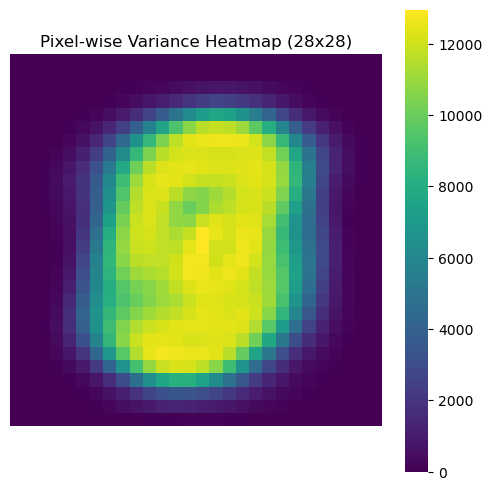

In [16]:
''' 
🧠 Why This Matters:
High variance areas (bright in heatmap) are where digits are written — useful for PCA, clustering, CNNs.
Low variance areas (dark corners) are mostly white space — can be pruned during feature engineering
'''

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the label column to keep only pixel data
pixel_data = train_df.drop("label", axis=1)

# Calculate variance across all rows for each pixel
pixel_variance = pixel_data.var(axis=0).values.reshape(28, 28)

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(pixel_variance, cmap='viridis', square=True, cbar=True)

plt.title("Pixel-wise Variance Heatmap (28x28)")
plt.axis('off')
plt.show()


## 7. 🌌 Dimensionality Insights
Before applying PCA, try:
 - Count number of pixels with >95% zero values
 - Compute feature-wise standard deviation
📌 This motivates dimensionality reduction next.

🔍 Pixels with >95% zeros: 386 out of 784 (49.23%)


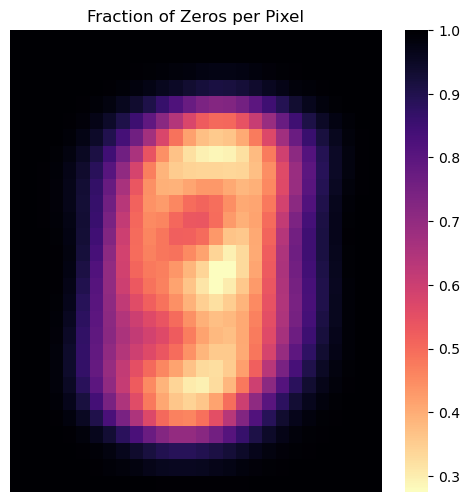

In [17]:
import pandas as pd
import numpy as np

# Get only pixel values
pixel_data = train_df.drop("label", axis=1)

# Normalize pixel values to [0, 1] for analysis
pixel_data_norm = pixel_data / 255.0

### 🔹 1. Count how many pixels are 0 in >95% of the samples
zero_fraction = (pixel_data_norm == 0).sum(axis=0) / len(pixel_data_norm)
high_zero_pixels = (zero_fraction > 0.95).sum()

print(f"🔍 Pixels with >95% zeros: {high_zero_pixels} out of {pixel_data_norm.shape[1]} ({(high_zero_pixels / 784) * 100:.2f}%)")

# Optional: Visualize high-zero areas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(zero_fraction.values.reshape(28, 28), cmap='magma_r')
plt.title("Fraction of Zeros per Pixel")
plt.axis('off')
plt.show()


📈 Pixel Std Dev – Mean: 0.1934, Min: 0.0000, Max: 0.4465


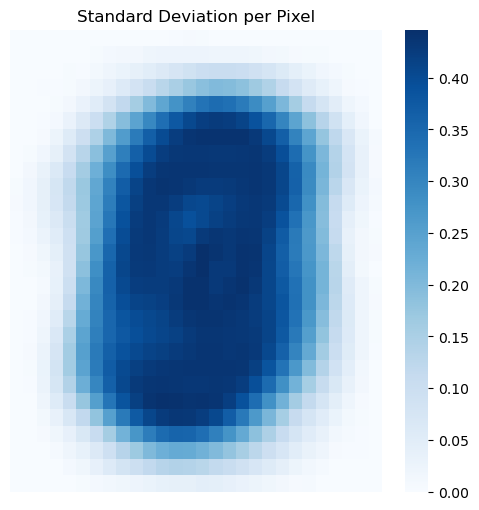

In [18]:
# 2. Compute feature-wise standard deviation

''' 
🧠 Why This Matters:
Helps justify PCA or feature selection: Many pixels are useless.
Useful for feature pruning before training traditional ML models.
Tells you how much redundancy exists in the 784-dimensional input.
'''


std_per_pixel = pixel_data_norm.std(axis=0)

# Summary statistics
print(f"\n📈 Pixel Std Dev – Mean: {std_per_pixel.mean():.4f}, Min: {std_per_pixel.min():.4f}, Max: {std_per_pixel.max():.4f}")

# Optional: Plot as heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(std_per_pixel.values.reshape(28, 28), cmap='Blues')
plt.title("Standard Deviation per Pixel")
plt.axis('off')
plt.show()


### 🔍 Interpretation
🔹 Pixels with >95% zeros: 386 out of 784 (49.23%)
Nearly half of all pixels are “dead zones” — they are zero (white background) in more than 95% of images.

These carry little to no information, especially for classical ML models like SVM, RF, etc.

📌 Insight: You could drop these pixels or compress using PCA/Autoencoder to retain only informative variance.

🔹 Pixel Std Dev – Mean: 0.1934, Min: 0.0000, Max: 0.4465
Mean Std Dev ≈ 0.19 suggests moderate variance across many pixels.

Min = 0.0000 — confirms some pixels never change (dead pixels).

Max = 0.4465 — pixels with this high variation likely lie in digit-heavy regions (like center strokes).



## 8. 💾 Save Preprocessed Data (Optional)
- Normalize pixel values to [0, 1] range (/255.0)
- Save flattened and reshaped versions for PCA, CNNs, etc.

In [ ]:
'''
import os
import numpy as np
import pandas as pd

# Assuming you already have:
# X = pixel data (without label), y = labels
# Normalize pixel values to [0, 1]
X_norm = X / 255.0
# Assuming test_df has 784 pixel columns, no label
test_df_norm = test_df / 255.0

# Create preprocessed folder if it doesn't exist
os.makedirs("../data/preprocessed", exist_ok=True)

# Save flattened version for classical ML models (PCA, SVC, RF)
np.save("../data/preprocessed/X_flattened.npy", X_norm.values)
np.save("../data/preprocessed/y_labels.npy", y.values)

# Save as .npy and .csv (like train)
np.save("../data/preprocessed/test_X_flattened.npy", test_df_norm.values)
test_df_norm.to_csv("../data/preprocessed/test_X_flattened.csv", index=False)

# Optional: Reshape for CNNs (num_samples, 28, 28, 1)
test_X_reshaped = test_df_norm.values.reshape(-1, 28, 28, 1)
np.save("../data/preprocessed/test_X_reshaped_cnn.npy", test_X_reshaped)

# Also save as CSV (optional, readable format)
X_norm.to_csv("../data/preprocessed/X_flattened.csv", index=False)
y.to_csv("../data/preprocessed/y_labels.csv", index=False)

# Save reshaped version for CNN input: (num_samples, 28, 28, 1)
X_reshaped = X_norm.values.reshape(-1, 28, 28, 1)
np.save("../data/preprocessed/X_reshaped_cnn.npy", X_reshaped)

print("✅ Preprocessed data saved in data/preprocessed/")
print("✅ Test data normalized and saved.")
'''

✅ Preprocessed data saved in data/preprocessed/
✅ Test data normalized and saved.
